<a href="https://colab.research.google.com/github/amgito1648/clase-inteligencia-artificial/blob/main/cuaderno_sopor_vector_machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# prompt: Realice un modelo en suport vector machine utilizando el data set de diabetes de kaggle, y predecir si con las variables sufre o no sufre de diabetes.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# 1. Carga de datos
# Asegúrate de que el archivo 'diabetes.csv' esté en la misma carpeta que tu notebook o especifica la ruta correcta.
data = kagglehub.dataset_download("akshaydattatraykhare/diabetes-dataset")

# 2. Preparación de los datos
X = data.drop('Outcome', axis=1)  # Variables predictoras
y = data['Outcome']  # Variable objetivo (diabetes o no)

# 3. División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Creación del modelo SVM
model = SVC(kernel='linear')  # Puedes probar diferentes kernels (linear, rbf, poly, sigmoid)

# 5. Entrenamiento del modelo
model.fit(X_train, y_train)

# 6. Predicciones
y_pred = model.predict(X_test)

# 7. Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy}')

print('\nInforme de clasificación:')
print(classification_report(y_test, y_pred))

# 8. (Opcional) Predicción para nuevos datos
# Puedes usar el modelo entrenado para predecir si nuevos pacientes tienen diabetes o no.
# Por ejemplo:
# new_patient_data = [[6, 148, 72, 35, 0, 33.6, 0.627, 50]]
# prediction = model.predict(new_patient_data)
# print(f'Predicción para el nuevo paciente: {prediction}')


AttributeError: 'str' object has no attribute 'drop'

In [8]:
import kagglehub
import pandas as pd # Import pandas and assign it the alias 'pd'

# Download latest version
path = kagglehub.dataset_download("akshaydattatraykhare/diabetes-dataset")

print("Path to dataset files:", path)
df=pd.read_csv(path + "/diabetes.csv")

Path to dataset files: /root/.cache/kagglehub/datasets/akshaydattatraykhare/diabetes-dataset/versions/1


In [9]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [11]:
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


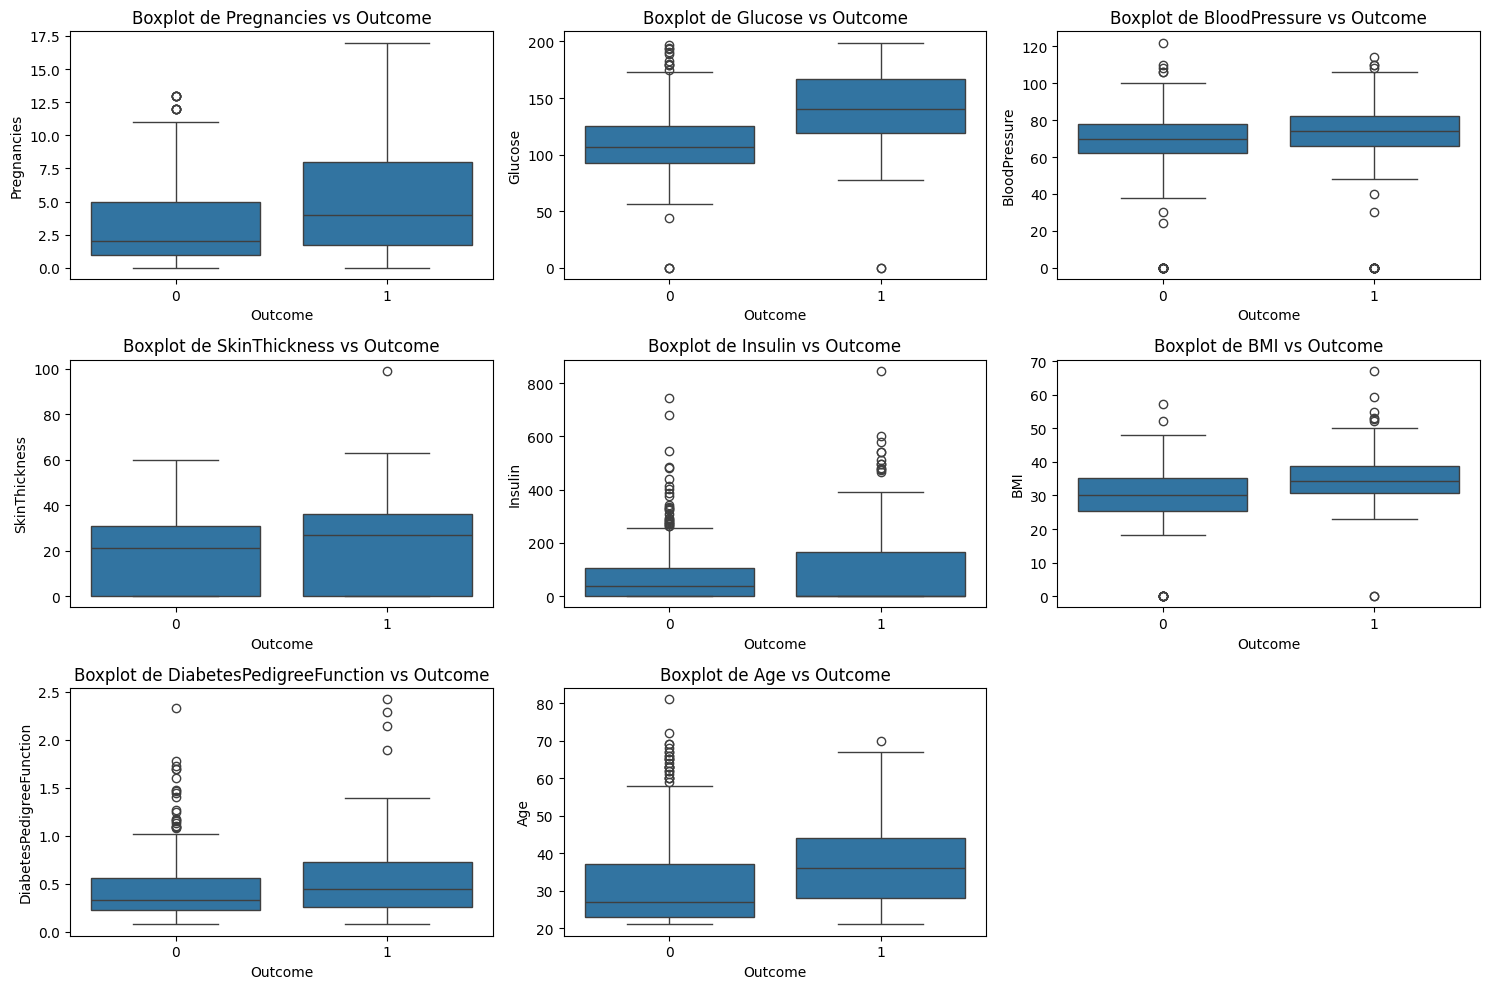

In [14]:
# prompt: #graficar la caja de bigotes de los features

import matplotlib.pyplot as plt
import seaborn as sns

# Crear la gráfica de caja de bigotes para cada feature
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[:-1]):  # Excluimos la columna 'Outcome'
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='Outcome', y=col, data=df)
    plt.title(f'Boxplot de {col} vs Outcome')

plt.tight_layout()
plt.show()


In [18]:
# prompt: separar los datos de entrenamiento y los datos de  prueba teniendo en cuenta que los datos  etiquetados es Out come

import pandas as pd
from sklearn.model_selection import train_test_split

# ... (Your existing code for data loading - make sure 'df' is your DataFrame) ...
# Assuming 'df' is your DataFrame, similar to previous cells:
# df=pd.read_csv(path + "/diabetes.csv")

# 2. Preparación



In [19]:
# prompt: normalizar los datos de entrenamiento y los datos de prueba usando minmax

from sklearn.preprocessing import MinMaxScaler

# ... (Your existing code for data loading and splitting into X_train, X_test, y_train, y_test) ...

# Crear un objeto MinMaxScaler
scaler = MinMaxScaler()

# Ajustar el scaler a los datos de entrenamiento y transformar los datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)

# Transformar los datos de prueba utilizando el mismo scaler ajustado con los datos de entrenamiento
X_test_scaled = scaler.transform(X_test)

# Ahora, X_train_scaled y X_test_scaled contienen los datos normalizados usando MinMax

# ... (Your existing code for model training and evaluation, using X_train_scaled and X_test_scaled instead of X_train and X_test) ...


NameError: name 'X_train' is not defined